In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_files

# for reproducibility
random_state = 0 

DATA_DIR = "./bbc/"
data = load_files(DATA_DIR, encoding="utf-8", decode_error="replace", random_state=random_state)
df = pd.DataFrame(list(zip(data['data'], data['target'])), columns=['text', 'label'])
df.head()

,text,label
0,Tate & Lyle boss bags top award\n\nTate & Lyle...,0
1,Halo 2 sells five million copies\n\nMicrosoft ...,4
2,MSPs hear renewed climate warning\n\nClimate c...,2
3,Pavey focuses on indoor success\n\nJo Pavey wi...,3
4,Tories reject rethink on axed MP\n\nSacked MP ...,2


In [7]:
# feature extraction - for each article in dataset computing TF-IDF values
vec = TfidfVectorizer(stop_words="english")
vec.fit(df.text.values)
features = vec.transform(df.text.values)
# now we have a feature matrix, we can feed to the model for training

In [8]:
# using KMeans and choosinf 5 as a number of clusters since thete 5 categories in the dataset
# creating a model
cls = MiniBatchKMeans(n_clusters=5, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

In [9]:
# predict cluster labels for new dataset
cls.predict(features)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_

array([3, 3, 3, ..., 0, 2, 4], dtype=int32)

## Vusialization

In [10]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

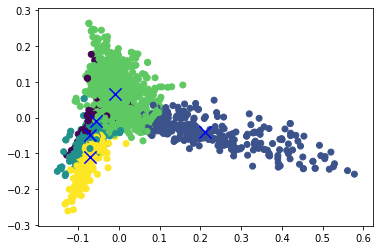

In [11]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

### Evalauation with labelled dataset

In [12]:
from sklearn.metrics import homogeneity_score
homogeneity_score(df.label, cls.predict(features))

0.5433462110559382

### Evalauation with unlabelled dataset

In [13]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))

0.009927737289334684